In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load the data into a DataFrame
df = pd.read_csv('netflix_titles.csv')

# Check the first 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Visualize shows vs movies
 Approximately two-thirds of the content available on Netflix consists of movies, while the remaining one-third is comprised of TV shows.

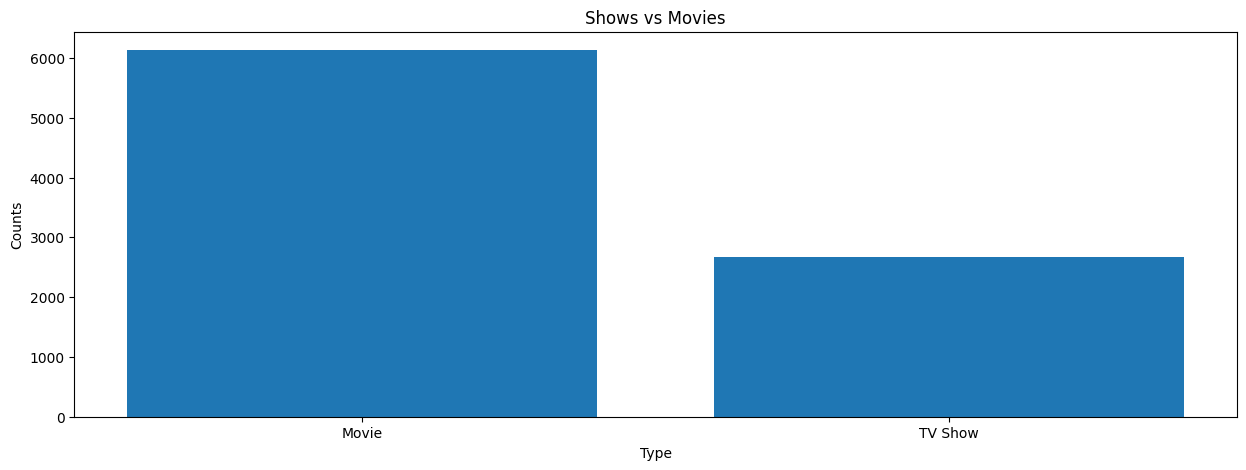

In [ ]:
race_counts = df['type'].value_counts()
plt.figure(figsize=(15,5))
# Plot the country counts
plt.bar(race_counts.index, race_counts.values)
plt.title('Shows vs Movies')
plt.xlabel('Type')
plt.ylabel('Counts')
plt.show()

### Visualize 10 shows and in each year and genre

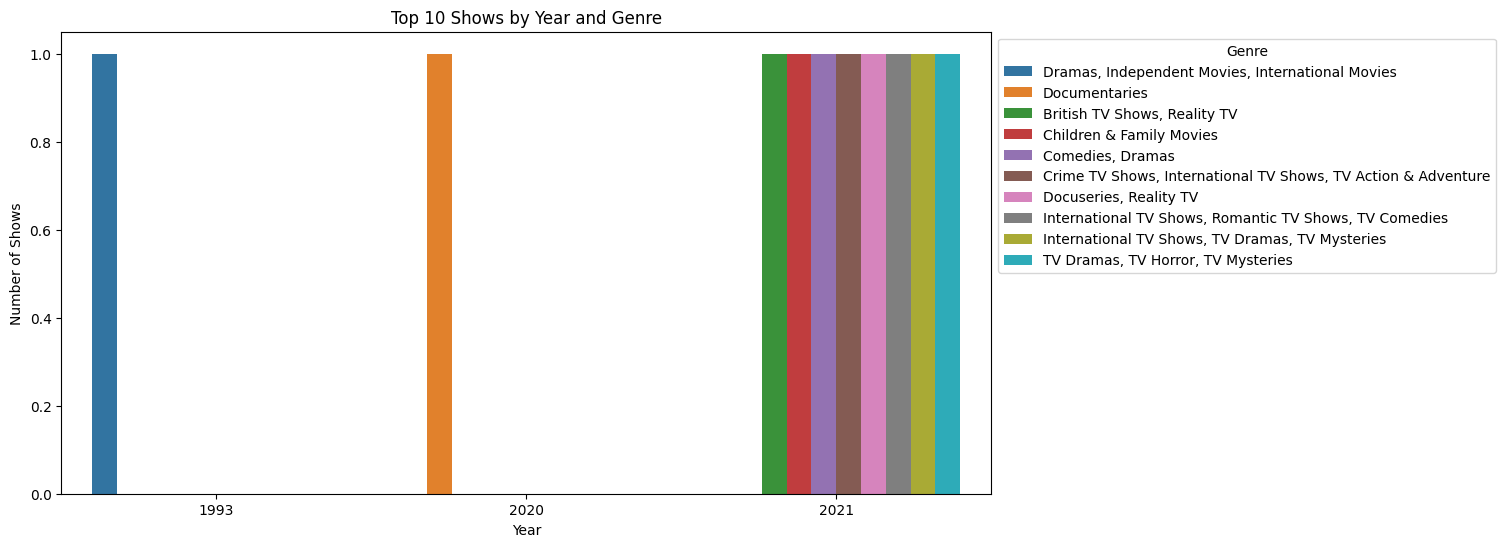

In [ ]:
top_10_shows = df.head(10)

# Create a grouped dataframe
grouped_data = top_10_shows.groupby(['release_year', 'listed_in']).size().reset_index(name='count')

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x='release_year', y='count', hue='listed_in', data=grouped_data)
plt.title('Top 10 Shows by Year and Genre')
plt.xlabel('Year')
plt.ylabel('Number of Shows')
plt.legend(title='Genre', bbox_to_anchor=(1, 1))
plt.show()

### Visualize Distribution of shows by country

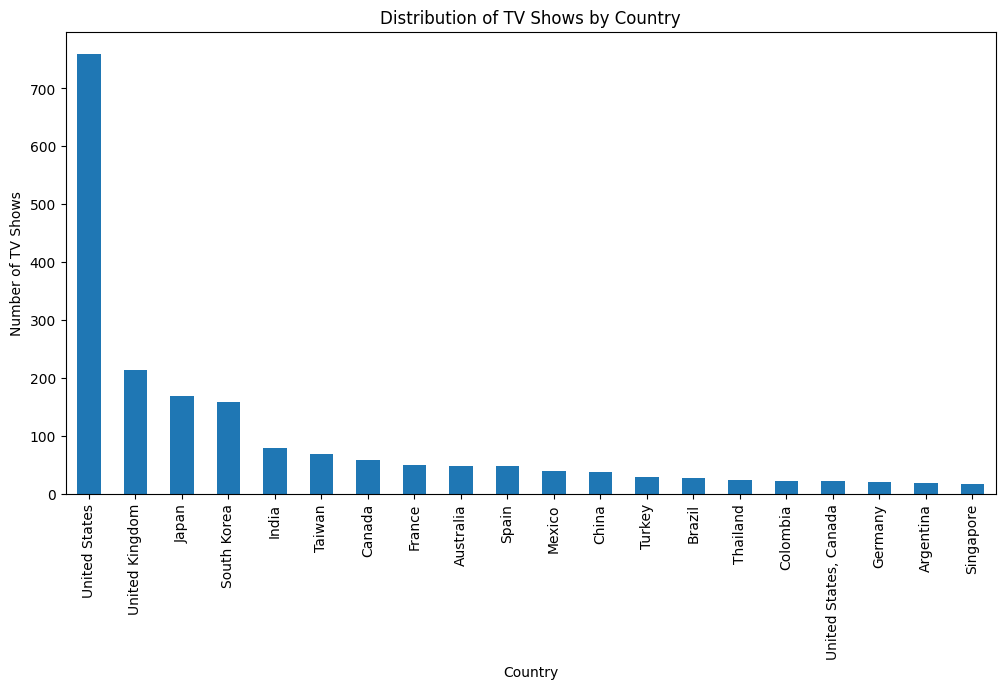

In [ ]:
tv_shows = df[df['type'] == 'TV Show']

# Calculate the number of TV Shows by grouping them by country
show_counts = tv_shows.groupby('country').size().sort_values(ascending=False)
top_countries = show_counts.head(20)
# Plot the distribution
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar')
plt.title('Distribution of TV Shows by Country')
plt.xlabel('Country')
plt.ylabel('Number of TV Shows')
plt.show()

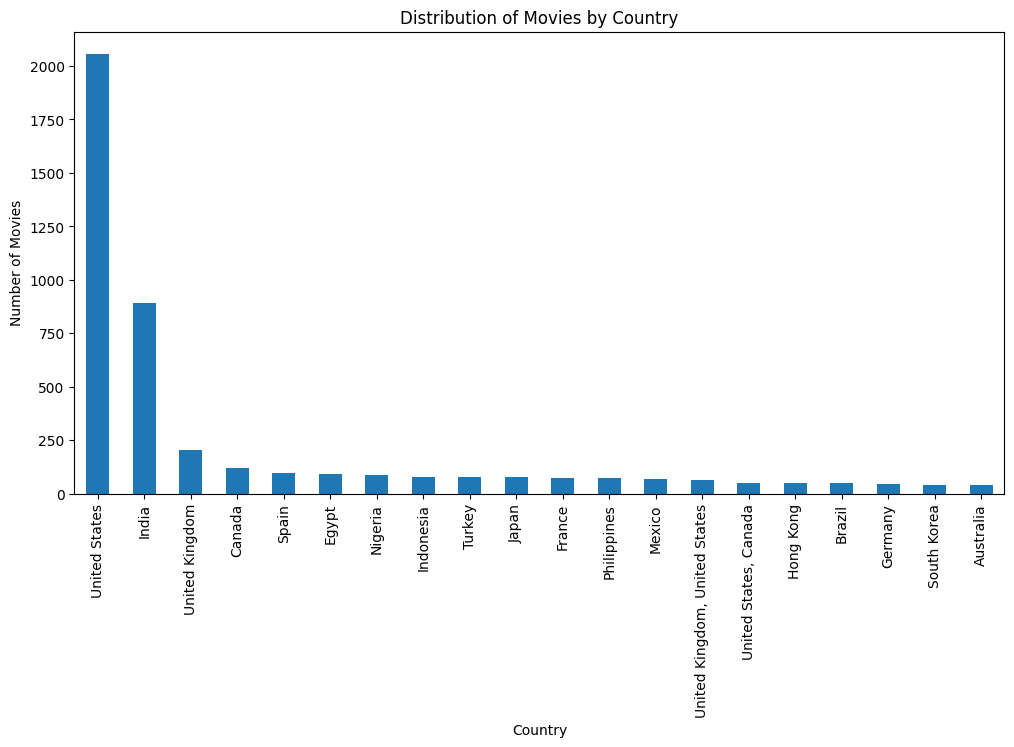

In [ ]:
tv_shows = df[df['type'] == 'Movie']

# Calculate the number of movies by grouping them by country
show_counts = tv_shows.groupby('country').size().sort_values(ascending=False)
top_countries = show_counts.head(20)
# Plot the distribution
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar')
plt.title('Distribution of Movies by Country')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.show()

### When we examine the graph, we see that the United States of America is the primary country of origin for the majority of movies and tv shows available on Netflix.

In [ ]:
df.info()
#check nulls
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### Clean and prepare data, get rid of nulls

In [ ]:
df.director.fillna('None',inplace=True)
df.cast.fillna('None',inplace=True)
df.country.fillna('None',inplace=True)
df.dropna(subset=['date_added','rating','duration'],inplace=True)
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

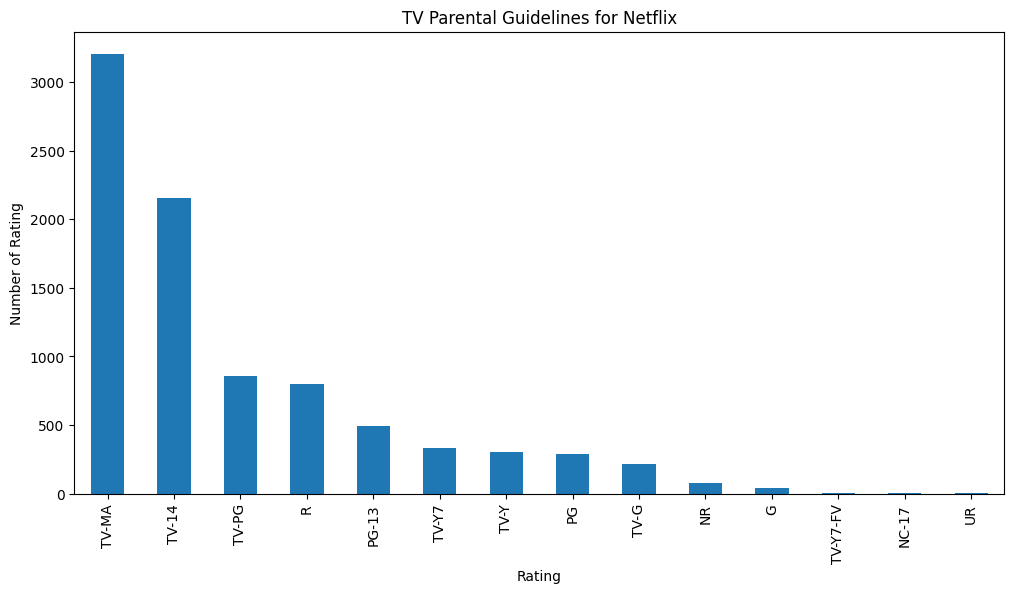

In [ ]:
show_rating = df.groupby('rating').size().sort_values(ascending=False)
top_rating = show_rating.head(20)
# Plot the distribution
plt.figure(figsize=(12, 6))
top_rating.plot(kind='bar')
plt.title('TV Parental Guidelines for Netflix')
plt.xlabel('Rating')
plt.ylabel('Number of Rating')
plt.show()

### TV-MA is an abbreviation for Mature Audience. This rating is just to alert you that the content you're about to watch isn't suitable for audiences under 17.TV-14 contains material that most parents would find unsuitable for children under 14 years of age.TV-PG contains material that parents may find unsuitable for younger children.


### Content with a TV-MA rating has a higher count compared to other ratings. This indicates that Netflix focuses more on adult-oriented content. TV-14 and TV-PG ratings are also commonly used. This shows that Netflix pays attention to providing content suitable for young viewers as well.


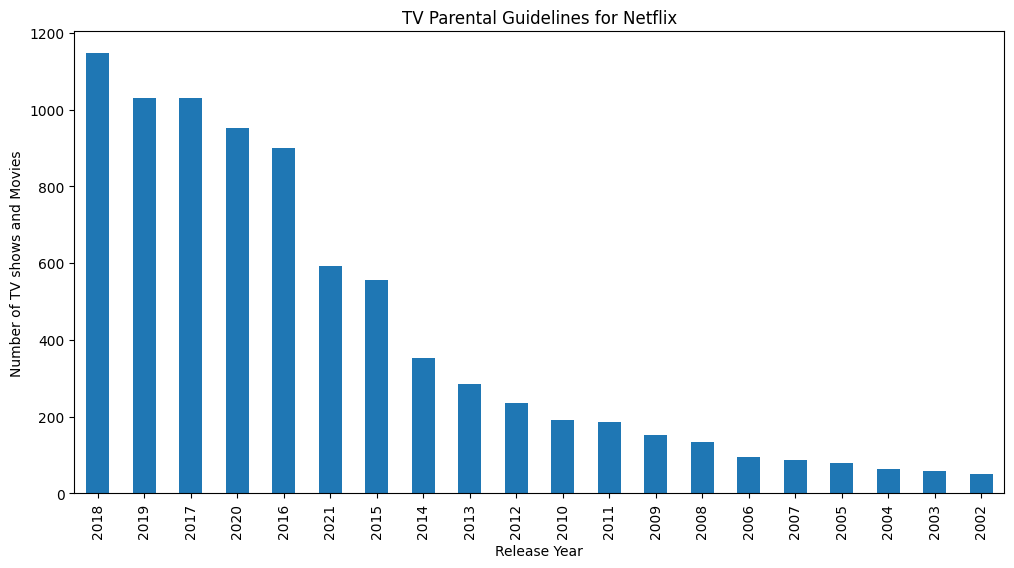

In [ ]:
show_rating = df.groupby('release_year').size().sort_values(ascending=False)
top_rating = show_rating.head(20)
# Plot the distribution
plt.figure(figsize=(12, 6))
top_rating.plot(kind='bar')
plt.title('TV Parental Guidelines for Netflix')
plt.xlabel('Release Year')
plt.ylabel('Number of TV shows and Movies')
plt.show()

2018 is the year when Netflix released the highest number of TV shows and movies. This indicates that Netflix particularly intensified its content production and release in 2018. Other years also show significant content production, but 2018 stands out as a prominent year. Based on these analyses, we can say that Netflix primarily focuses on adult-oriented content and 2018 was a significant turning point in content production.

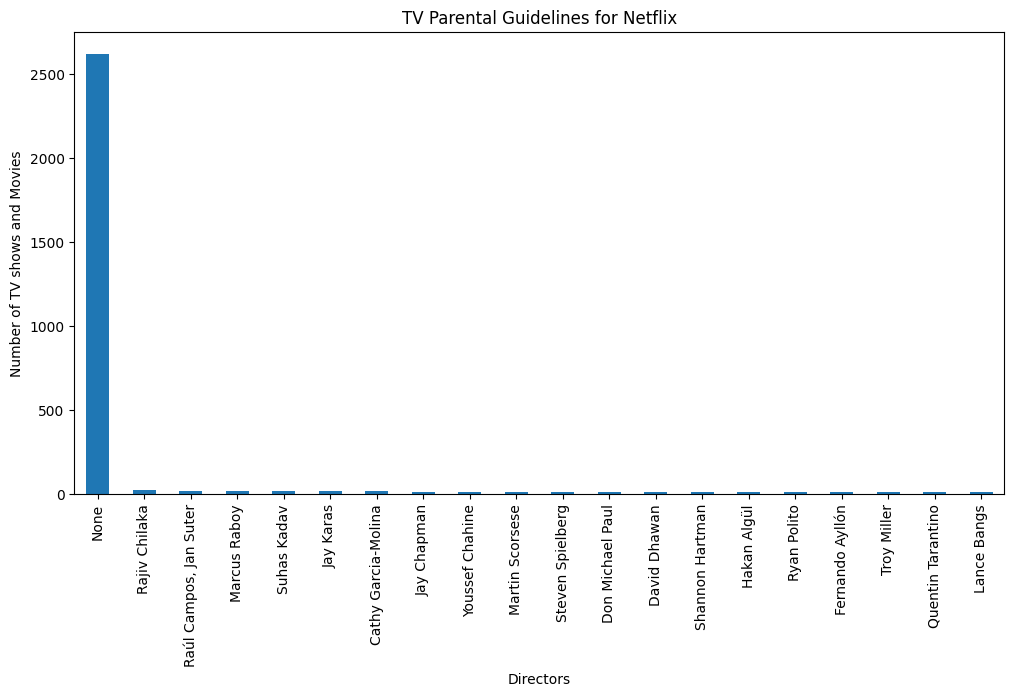

In [ ]:
show_rating = df.groupby('director').size().sort_values(ascending=False)
top_rating = show_rating.head(20)
# Plot the distribution
plt.figure(figsize=(12, 6))
top_rating.plot(kind='bar')
plt.title('TV Parental Guidelines for Netflix')
plt.xlabel('Directors')
plt.ylabel('Number of TV shows and Movies')
plt.show()


### Install Faker

In [ ]:
!pip install Faker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.1 MB/s eta 0:00:00


### Using a mock data tool and Netflix-Shows file provided to you, create mock viewer data for at least 10,000 viewers. Dataset attribute should have at least following
### Username,Country of User,Title,Date Watched,Percentage watched,

In [ ]:
from faker import Faker
import random
from datetime import datetime, timedelta
import pandas as pd

# Create a Faker object
fake = Faker()

# Set the random seed for reproducibility
random.seed(42)

# Load Netflix show titles from a file or database
show_titles = pd.read_csv("netflix_titles.csv")["title"].tolist()
show_ratings = pd.read_csv("netflix_titles.csv")["rating"].tolist()
# Define the number of viewer records to generate
num_viewers = 10000

# Create empty lists to store the generated viewer data
usernames = []
countries = []
titles = []
dates_watched = []
percentages_watched = []
ratings = []


# Generate viewer data
for _ in range(num_viewers):
    username = fake.user_name()
    country = fake.country()
    num_films_watched = random.randint(1, 5)  # Set the maximum number of films watched per user

    for _ in range(num_films_watched):
        usernames.append(username)
        countries.append(country)
        title = random.choice(show_titles)  # Select a random title from the loaded show titles
        titles.append(title)
        rating=random.choice(show_ratings)
        ratings.append(rating)
        dates_watched.append(fake.date_between(start_date='-1y', end_date='today'))
        percentages_watched.append(random.uniform(0, 100))

# Create a DataFrame from the generated data
viewer_data = pd.DataFrame({
    'Username': usernames,
    'Country': countries,
    'Title': titles,
    'Date Watched': dates_watched,
    'Percentage Watched': percentages_watched,
    'Rating': ratings
})

viewer_data.to_csv('viewer_data2.csv', index=False)

viewer_data

,Username,Country,Title,Date Watched,Percentage Watched,Rating
0,collinscrystal,Croatia,Chhota Bheem & Krishna: Pataliputra- City of t...,2023-01-02,24.489185,TV-MA
1,kevinli,Hungary,Singham,2023-03-24,59.049251,TV-Y7
2,kevinli,Hungary,I Think You Should Leave with Tim Robinson,2023-02-20,9.369524,TV-14
3,kristentownsend,Lithuania,The Diabolical,2022-11-12,56.124506,TV-MA
4,kristentownsend,Lithuania,Gonul,2022-08-23,44.920905,TV-MA
...,...,...,...,...,...,...
30008,millerthomas,France,Horrid Henry,2022-06-16,55.043116,R
30009,donna83,Cyprus,Initial D,2022-06-24,40.791922,TV-PG
30010,donna83,Cyprus,Answer for Heaven,2022-09-27,20.227756,TV-MA
30011,donna83,Cyprus,Incir Receli 2,2022-08-25,32.193483,TV-14


### I need to minimize the dataset because in the clustering and other operations takes lots of time.

In [ ]:
# Reduce the viewer_data dataset to 1000 records
reduced_viewer_data = viewer_data.sample(n=1000, random_state=42)

# Reset the index of the reduced dataset
reduced_viewer_data = reduced_viewer_data.reset_index(drop=True)

# Print the reduced dataset
print(reduced_viewer_data)
reduced_viewer_data.to_csv('mock_viewer_data.csv',index=False)


           Username                               Country  \
0       nguyenjames                               Namibia   
1       ericramirez                            Azerbaijan   
2             ccole      Saint Vincent and the Grenadines   
3    russellbrandon                       Kyrgyz Republic   
4     courtneydavis                                  Guam   
..              ...                                   ...   
995  charlescoleman                                Uganda   
996     kathrynbell                                Uganda   
997        rjackson  United States Minor Outlying Islands   
998    hardingaaron                 Saint Kitts and Nevis   
999   cameronabbott                 Saint Kitts and Nevis   

                                   Title Date Watched  Percentage Watched  \
0    To All The Boys: Always And Forever   2022-07-26           20.156132   
1                                 Iceman   2022-09-29           76.724487   
2                            Almost 